# Supervised Learning with scikit-learn

# Load package

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.neighbors import KNeighborsClassifier
%config InlineBackend.figure_format = 'retina'
from sklearn.model_selection import train_test_split

#### Read csv

In [2]:
colnames=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
url='https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv'
df=pd.read_csv(url,names=colnames, header=None)    

#### imputer

In [3]:
#treat "?": replace them with NA
df= df.replace("?", np.nan)

In [4]:
# The columns containing numerical values
STRING_COLUMNS =colnames  # The columns containing strings
# Now, we will do the same for column 'cartype', which consists of string values
str_imputer = SimpleImputer(missing_values = np.NAN, strategy = 'most_frequent')        # To impute missing values that should be strings we will use the most frequent type from that column
str_imputer = str_imputer.fit(df[STRING_COLUMNS])                                # Calculate the most frequent value
df[STRING_COLUMNS] = str_imputer.transform(df[STRING_COLUMNS])            # Fill in the NaN's with the correct value
data=df

In [5]:
data.loc[:,data.columns!='party'] =data.loc[:,data.columns!='party'].replace(['y','n'],[1,0])

# 2. EDA

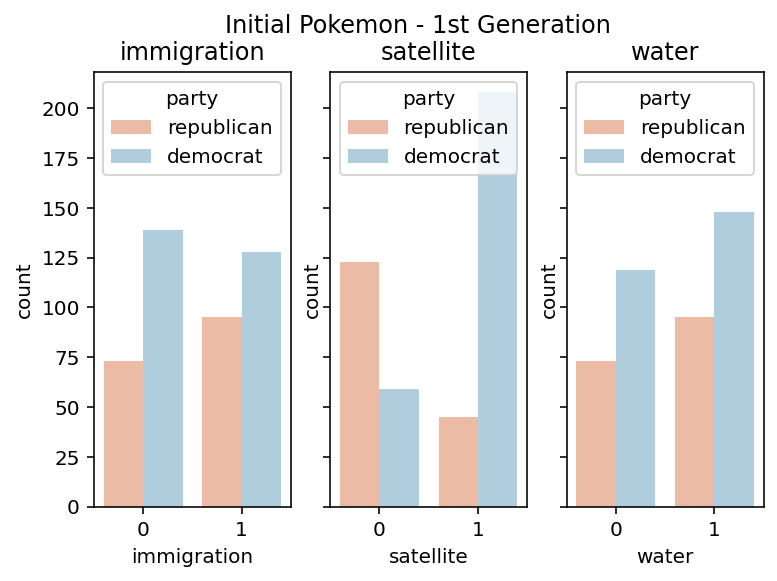

In [8]:
fig, axes = plt.subplots(1,3, sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
x_columns=['immigration','satellite','water']
for i, x_column in enumerate(x_columns):
    sns.countplot(ax=axes[i], x=x_column,hue='party',data=data,palette='RdBu')
    axes[i].set_title(x_column)

### co-relation

# 3.Model

#### split data

In [11]:
y=data['party'].values
X=data.drop('party', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### bulid and evaluate model KNN

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn_4, X_train, y_train, cv=3,scoring='accuracy')

prediction

In [ ]:
# Predict the labels for the training data X: y_pred
knn.predict(pd.DataFrame(X_test[0,:]).T)

#### Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score
knn_pred=knn.predict(X_test)
accuracy_score(y_test, knn_pred) 

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, knn_pred))

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

### hypermeter evaluation

#### for loop 

In [ ]:
score=[]
for i in [2,4,6,8]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
print(score)

In [ ]:
svc= KNeighborsClassifier()

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[2,4,6,8], 'weights':['uniform', 'distance']}
clf = GridSearchCV(svc, parameters,cv=4)
clf.fit(X_train, y_train)

In [ ]:
print(clf.best_score_)
print(clf.best_estimator_)

In [ ]:
knn.score(X_test, y_test)


#### RandomizedSearchCV

In [ ]:
from scipy.stats import randint
print(randint(1,9))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_neighbors':randint(1,9)}
tree_cv=RandomizedSearchCV(svc, param_dist, cv=4)
tree_cv.fit(X_train, y_train)

In [ ]:
print(tree_cv.best_score_)
print(tree_cv.best_estimator_)

#### without drop

In [ ]:
df_dropna=pd.read_csv(url,names=colnames, header=None)
df_dropna= df_dropna.replace("?", np.nan)
df_dropna=df_dropna.dropna()
df_dropna.loc[:,df_dropna.columns!='party']=df_dropna.loc[:,df_dropna.columns!='party'].replace(['y','n'],[1,0])


In [ ]:
y=df_dropna['party'].values
X=df_dropna.drop('party', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=4, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

#### Tuning

In [ ]:
score_lg=[]
for i in [2,4,5,6,8]:
    lg=LogisticRegressionCV(cv=i, random_state=0).fit(X_train, y_train)
    score_lg.append(lg.score(X_test, y_test))
print(score_lg)

In [ ]:
print(score_lg)

#### difference btw Logistic and SVM

#### Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=8,
                            criterion='entropy',
                            random_state=1)
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

OOB, similar to cross-validation<BR> 
63% of the training instances are sampled.<BR>The remaining 37% constitute the OOB instances.

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
rf.fit(X_train, y_train) 

In [ ]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

#### evaluate regression/classification tree

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
# Compute y_pred
y_pred = dt.predict(X_test)
# Compute mse_dt
mse_dt = MSE(y_pred, y_test)
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred)

#### Pipeline

In [12]:
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
## build pipeline with 
# 1. StandardScaler for standarization. 
# 2. PCA for feature reducer
# 3. RandomForest for Classifier
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

pipe.fit(X_train, y_train)
print(pipe.steps[1][1].explained_variance_ratio_)

[0.45522495 0.08210242 0.06996159]


access estimators

In [19]:
# The estimators of a pipeline are stored as a list in the steps attribute, 
pipe.steps[1][1]
# but can be accessed by index 
pipe[1]
# or name by indexing (with [idx]) the Pipeline:
pipe['reducer']

PCA(n_components=3)

pipeline gridsearch

In [24]:
#Nested parameters
pipe.set_params(reducer__n_components=5)
#Nested parameters for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = dict(reducer__n_components=[2, 5, 10],classifier__n_estimators=[10, 100],classifier__max_depth=[2,3,4])
grid_search = GridSearchCV(pipe, param_grid=param_grid)

#### Ensemble Classifier

In [ ]:
# Set seed for reproducibility
SEED=1
lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    print('{:s} : {:.3f}'.format(clf_name, accuracy))